In [49]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [50]:
df = pd.read_csv('Sanka.csv')

In [51]:
df = df[df['Team']=='Home']

In [52]:
df['passer'] = df['From']
df['recipient'] = df['To']

In [53]:
passes = df[df['Type']=='PASS']

In [54]:
passes['x'] = passes['x']*100
passes['y'] = passes['y']*100
passes['x_end'] = passes['x_end']*100
passes['y_end'] = passes['y_end']*100


<ipython-input-54-9ee0e1421ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['x'] = passes['x']*100
<ipython-input-54-9ee0e1421ed6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['y'] = passes['y']*100
<ipython-input-54-9ee0e1421ed6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [55]:
average_locations = passes.groupby('From').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [56]:
average_locations

,x,y,count
From,,,
Player1,40.500000,83.750000,8
Player10,55.821429,42.714286,28
Player11,67.000000,51.058824,17
Player12,51.094340,54.679245,53
Player13,32.857143,51.571429,7
Player14,56.125000,25.500000,8
Player2,56.068182,44.250000,44
Player3,59.024390,55.609756,41
Player4,53.319149,50.404255,47


In [60]:
pass_between = passes.groupby(['From','To']).count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between

,From,To,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],x,y,x_end,y_end,passer,recipient
0,Player1,Player10,2,2,0,2,2,2,2,2,2,2,2,2,2,2
1,Player1,Player2,2,2,0,2,2,2,2,2,2,2,2,2,2,2
2,Player1,Player5,2,2,0,2,2,2,2,2,2,2,2,2,2,2
3,Player1,Player6,1,1,0,1,1,1,1,1,1,1,1,1,1,1
4,Player1,Player7,1,1,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Player9,Player4,4,4,0,4,4,4,4,4,4,4,4,4,4,4
121,Player9,Player5,1,1,0,1,1,1,1,1,1,1,1,1,1,1
122,Player9,Player6,3,3,0,3,3,3,3,3,3,3,3,3,3,3
123,Player9,Player7,1,1,0,1,1,1,1,1,1,1,1,1,1,1


In [61]:
pass_between = pass_between.merge(average_locations, left_on='From',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='To',right_index=True,suffixes=['', '_end'])

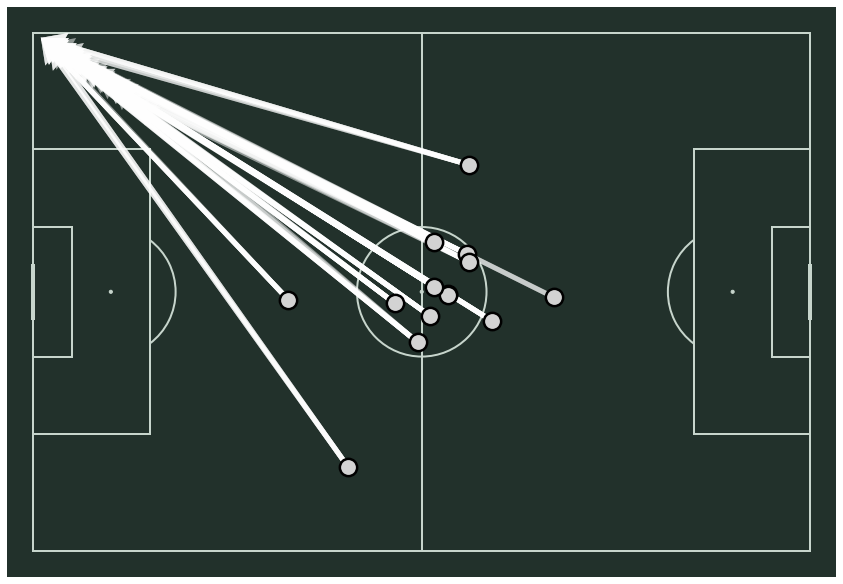

In [63]:
pitch = pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

